<a href="https://colab.research.google.com/github/romulokps/testesPCR/blob/main/resultadoTestes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

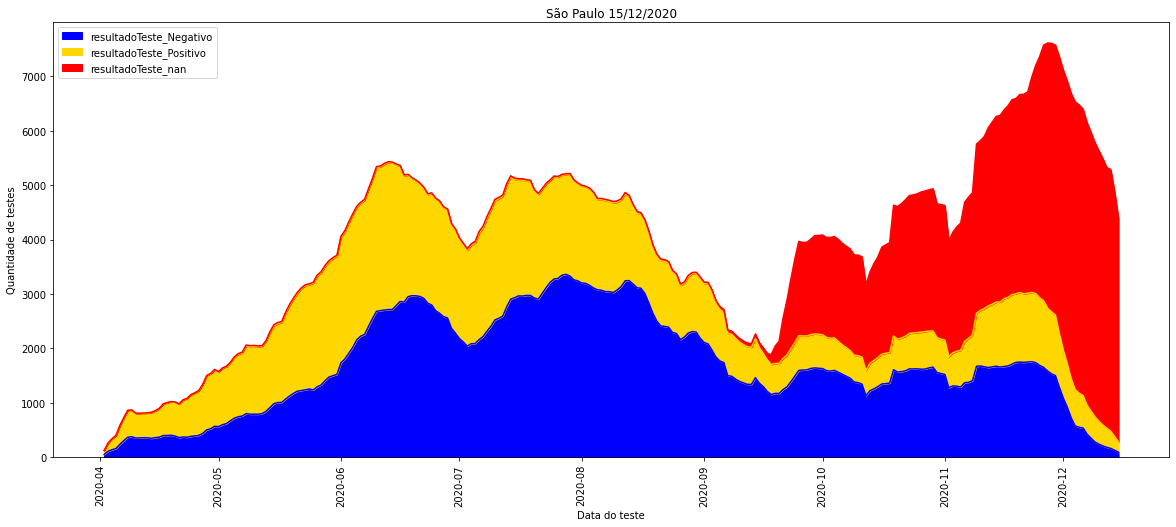

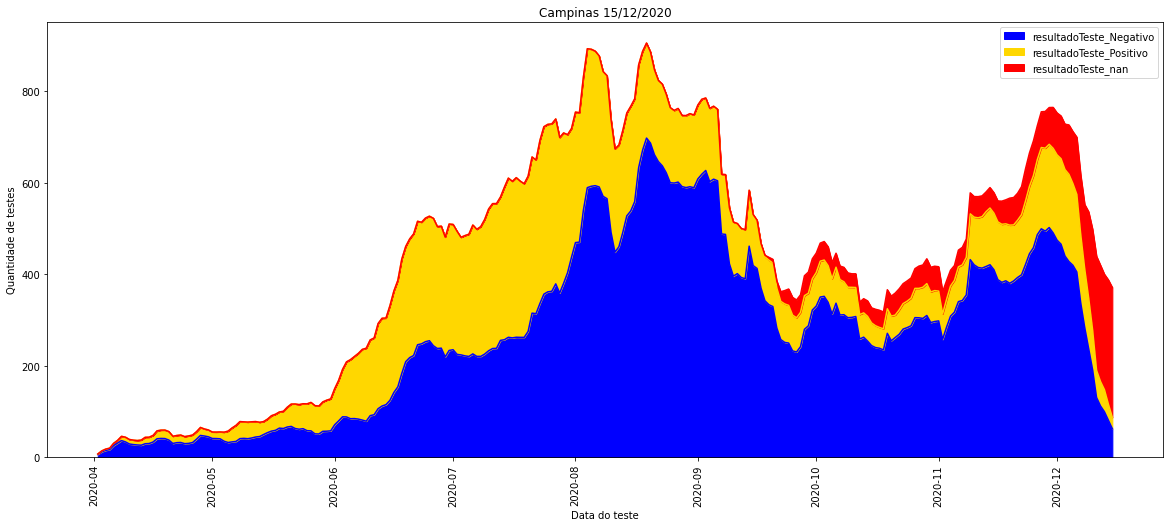

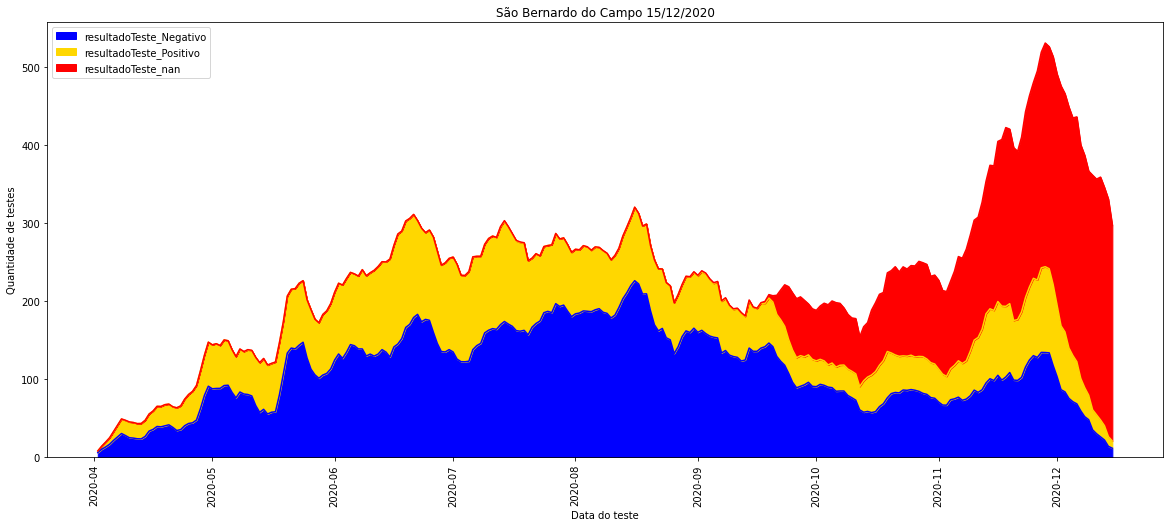

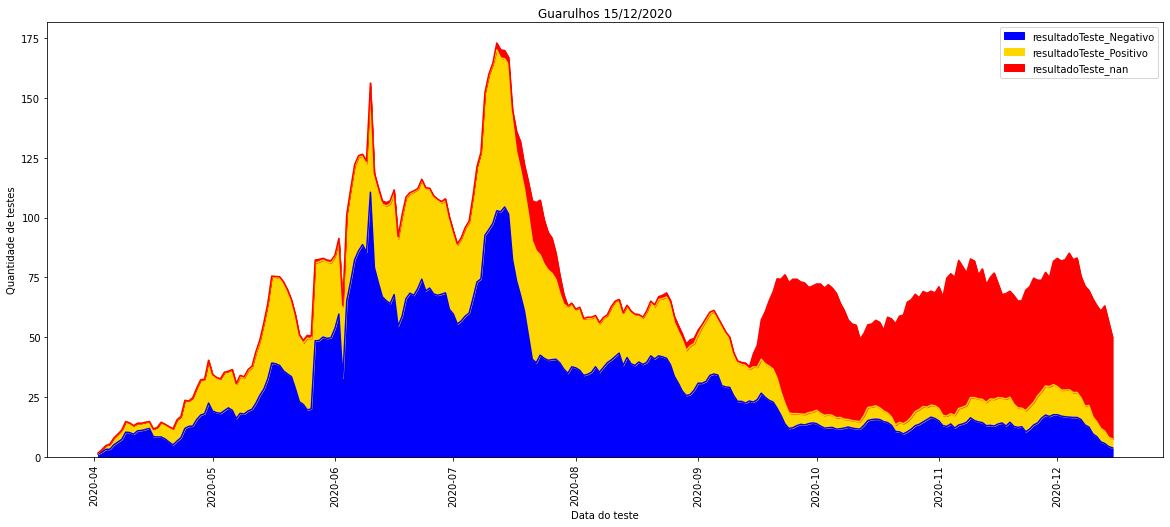

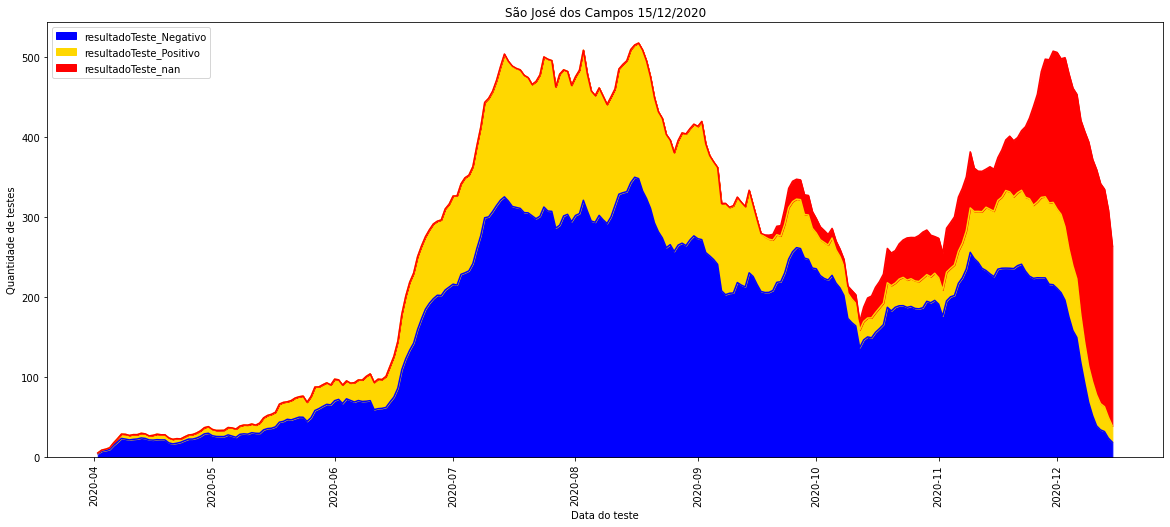

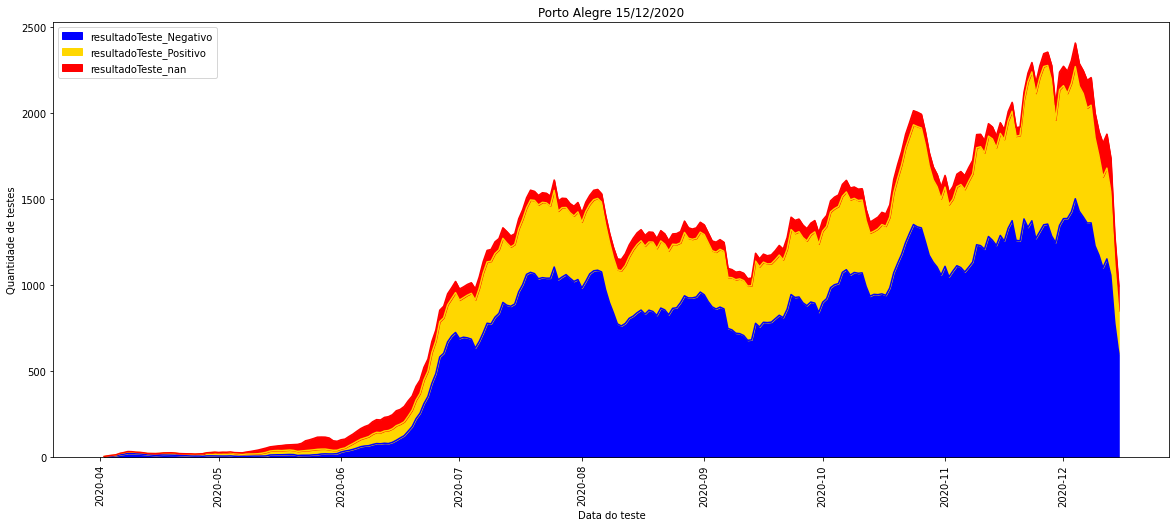

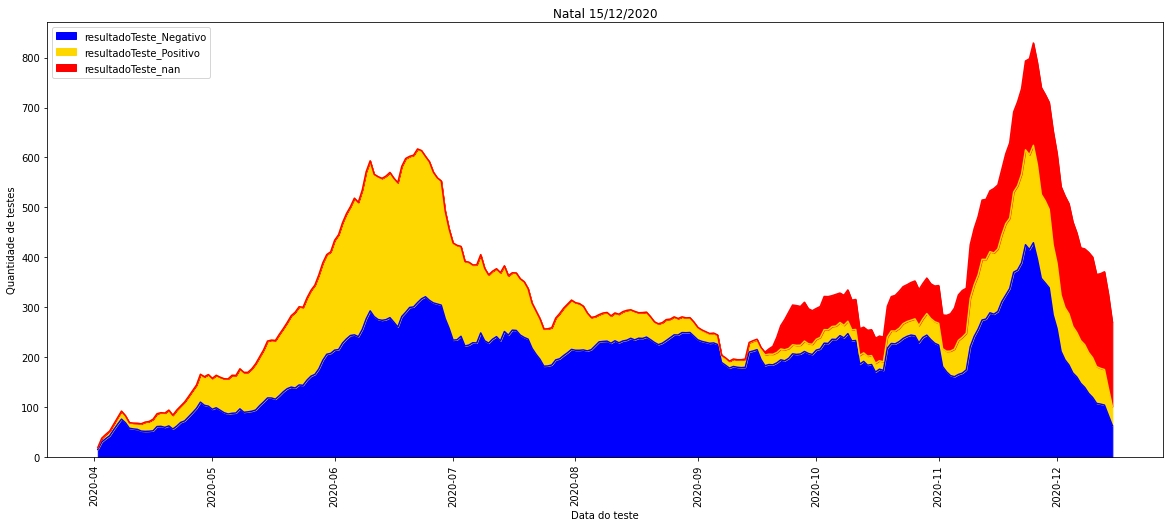

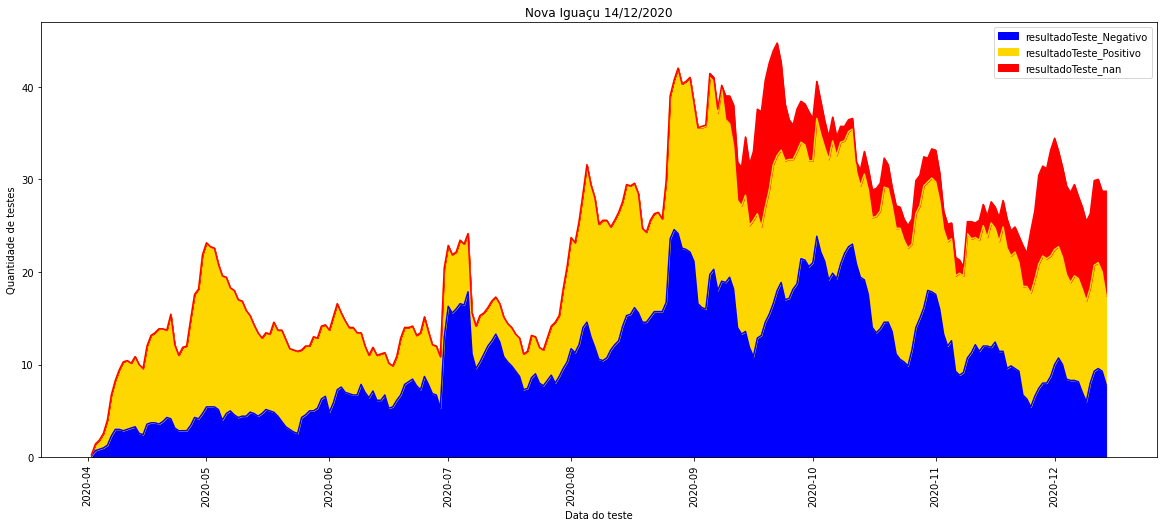

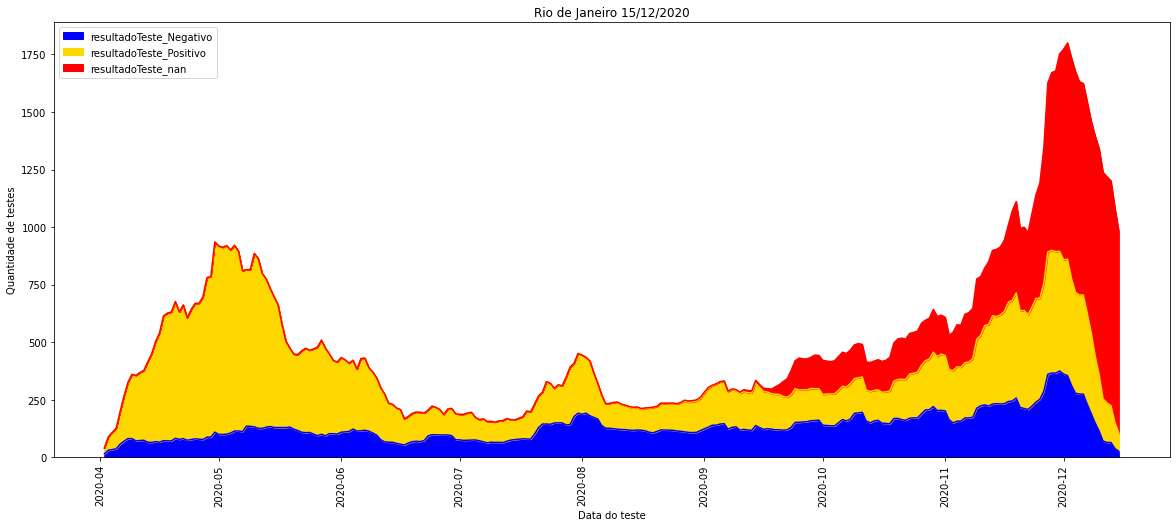

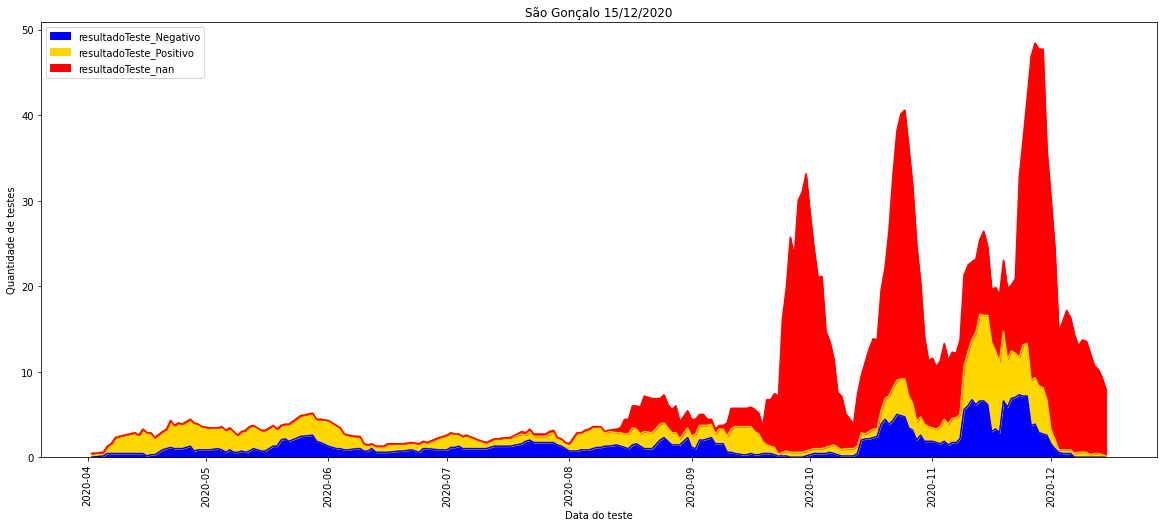

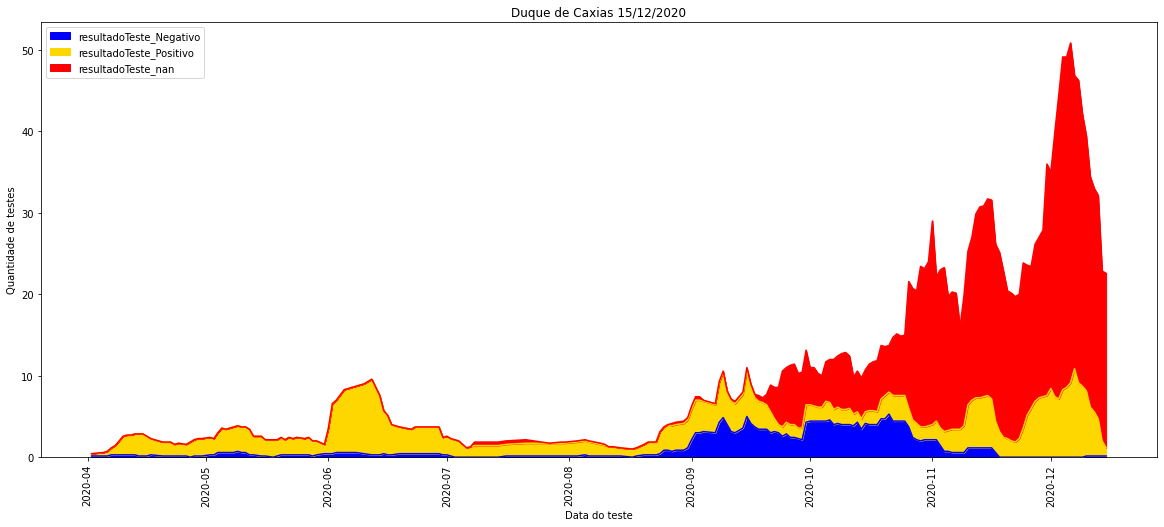

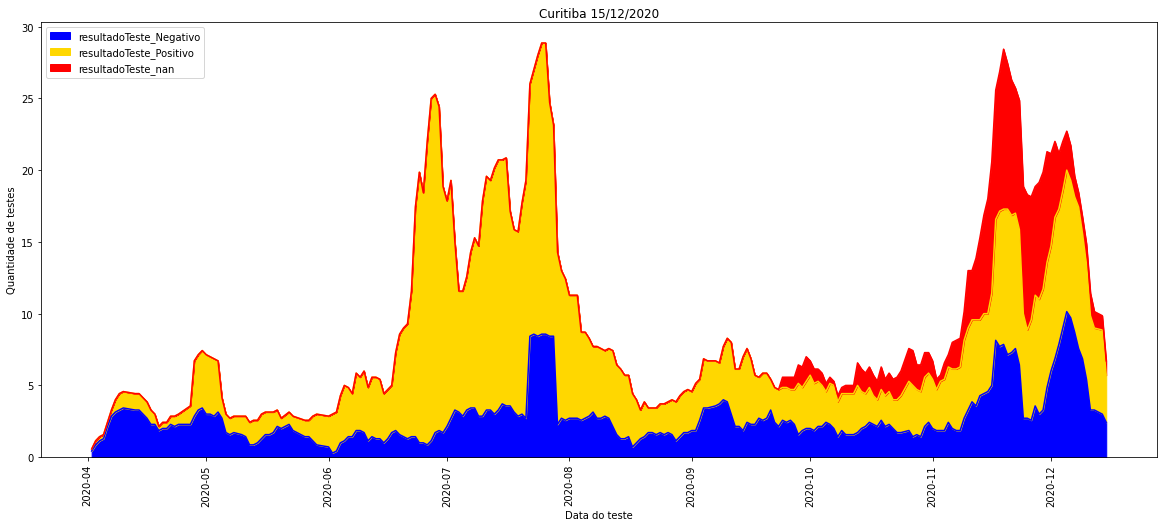

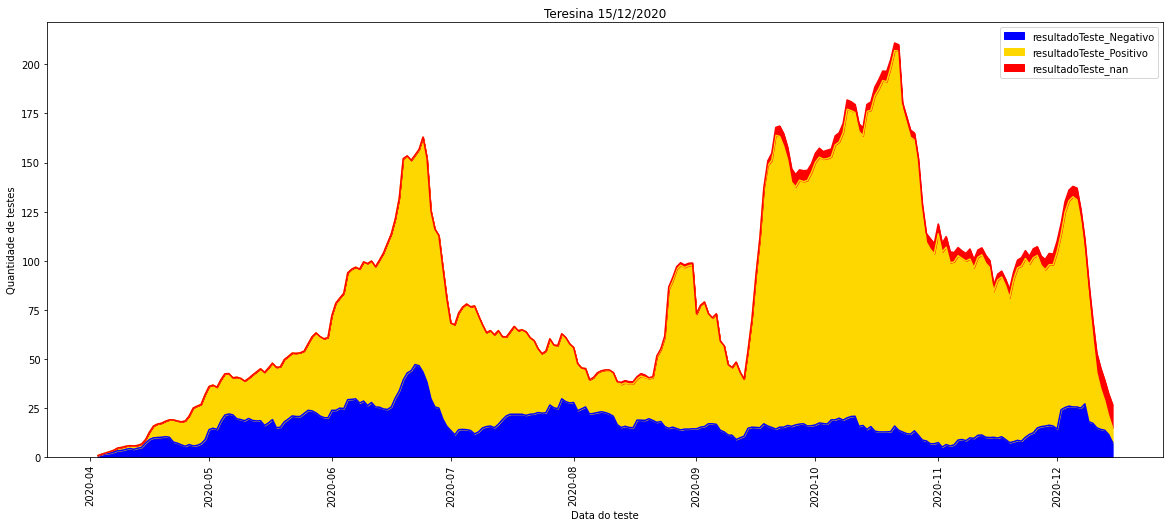

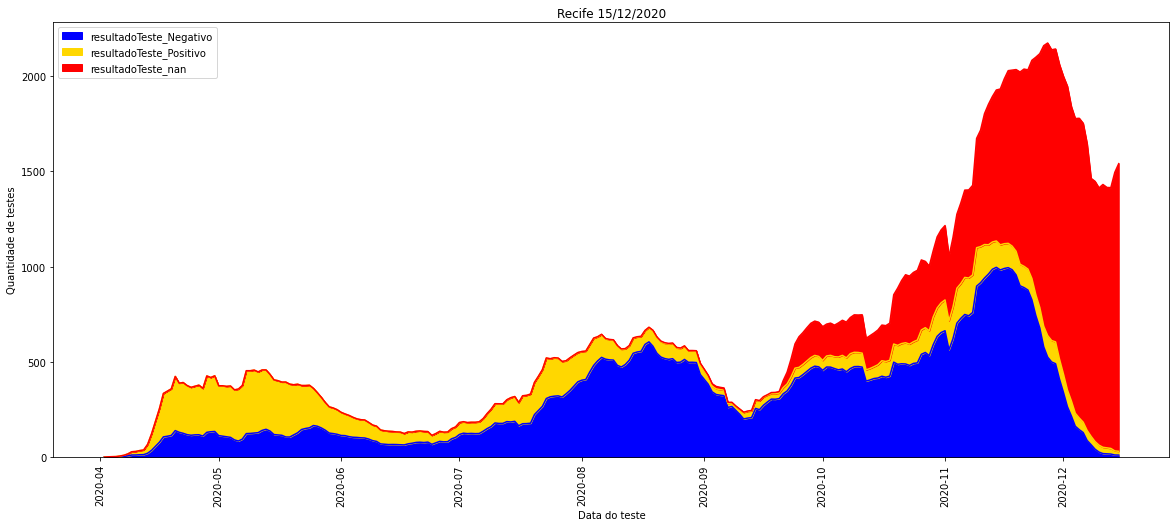

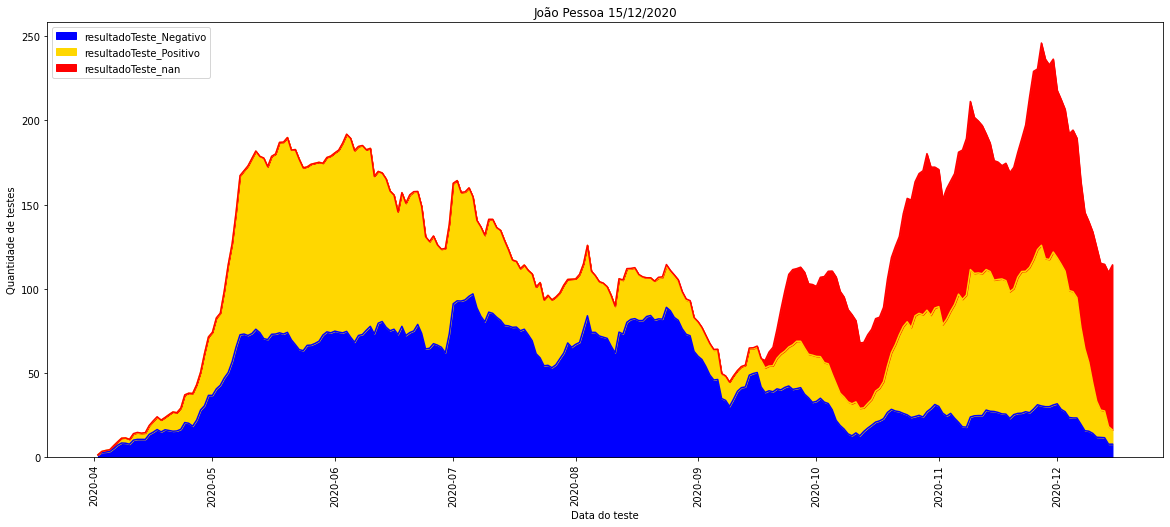

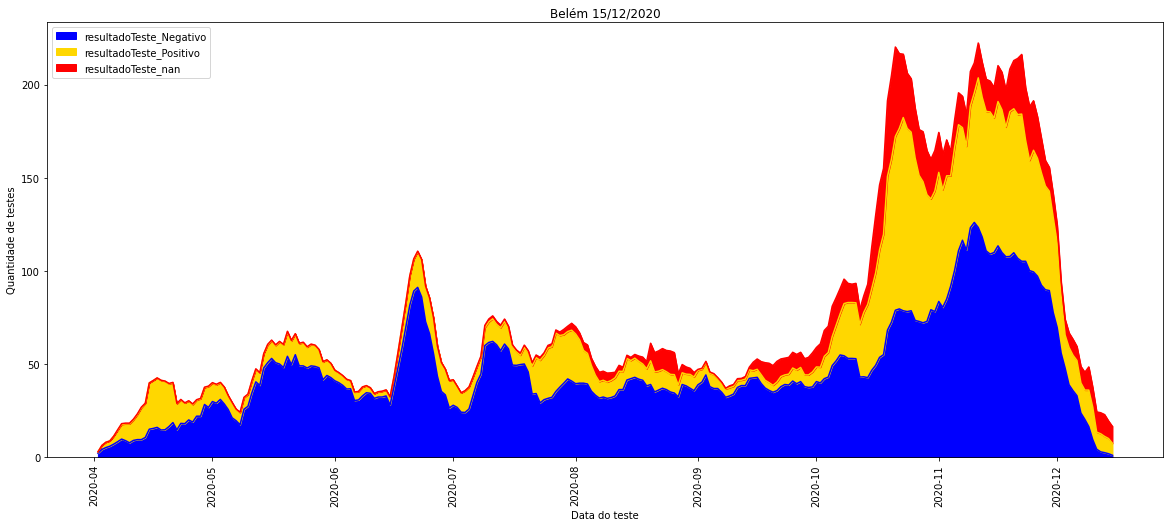

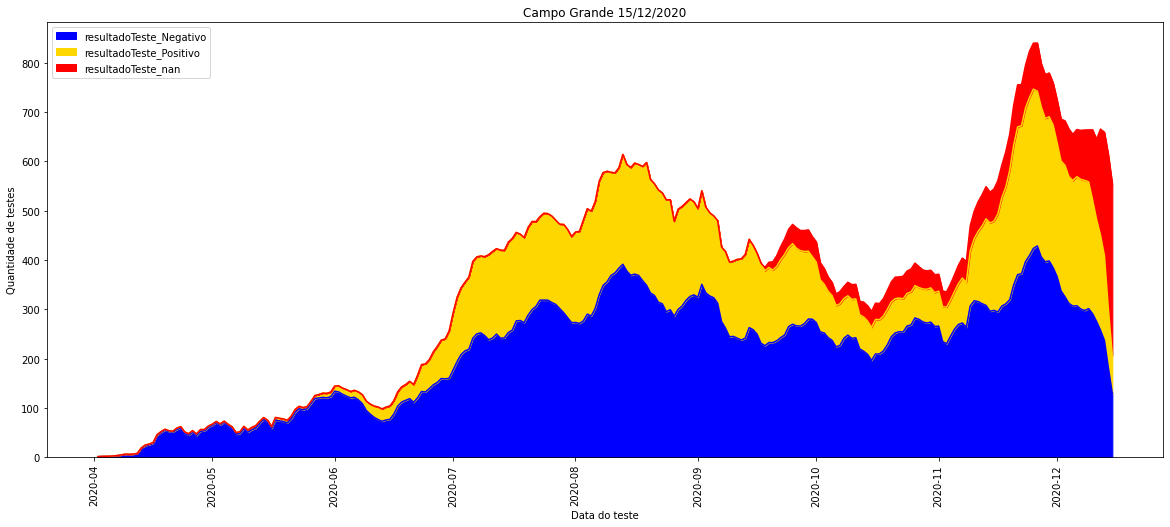

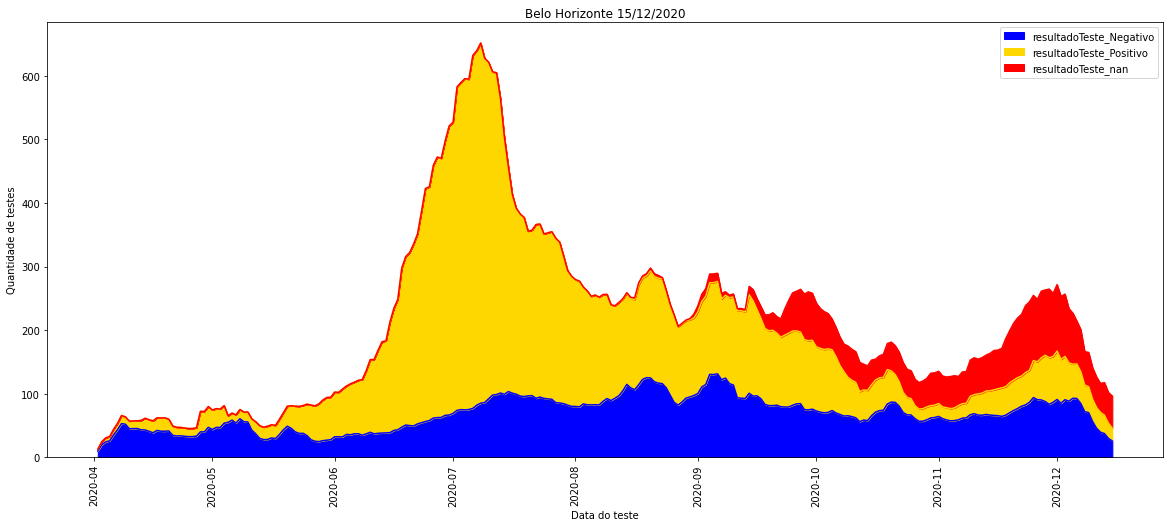

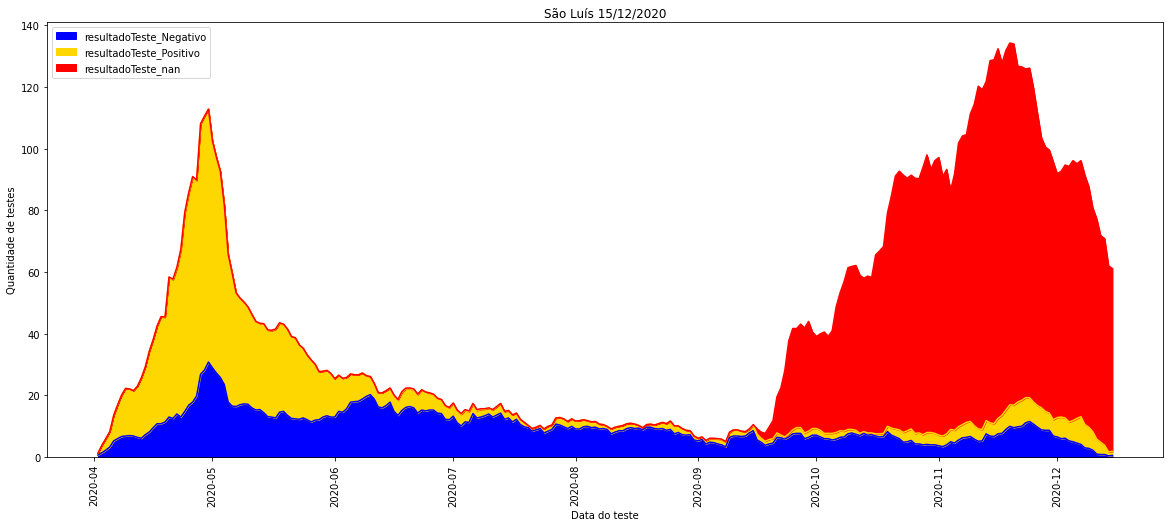

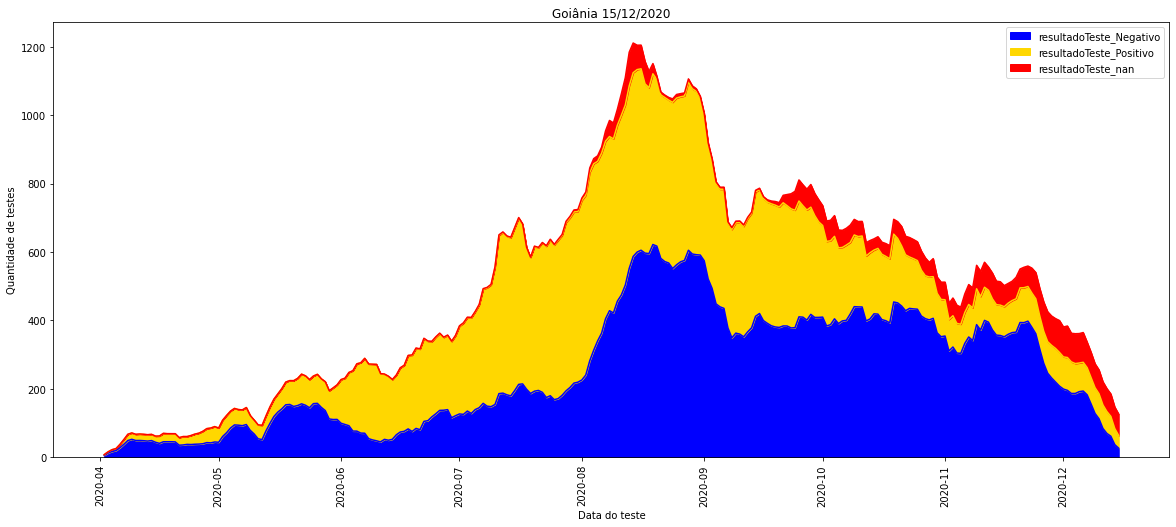

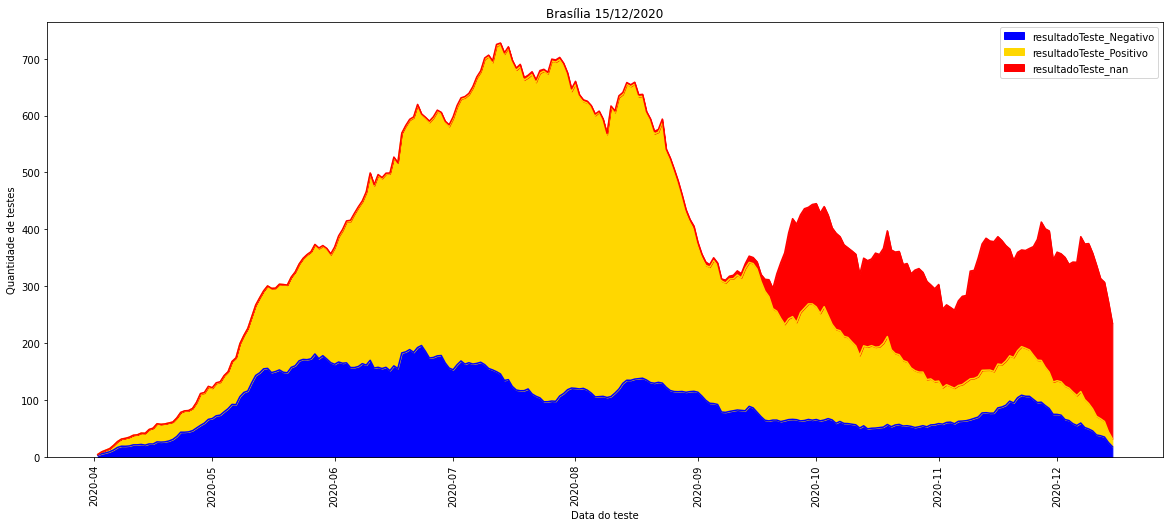

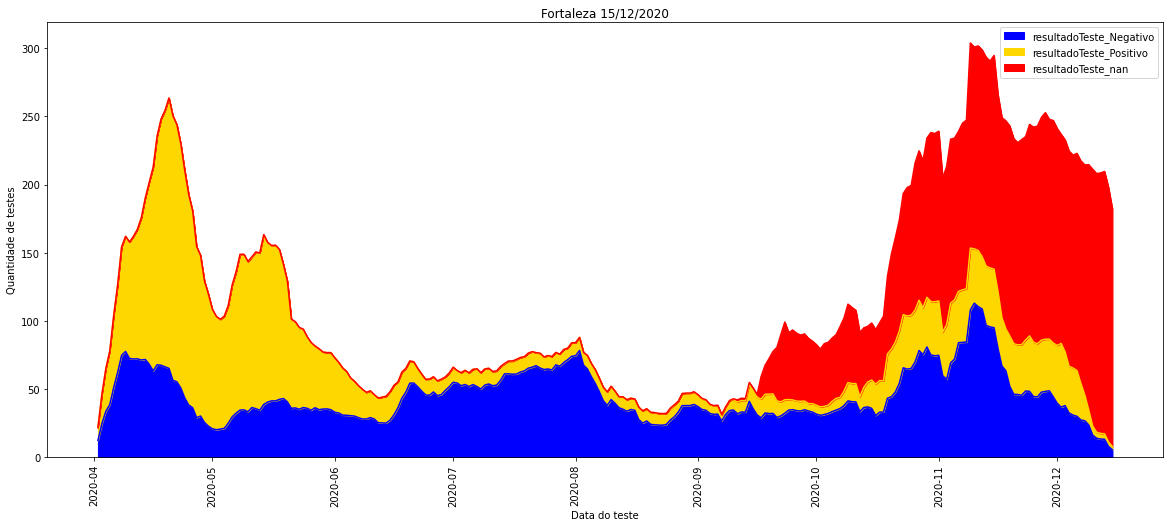

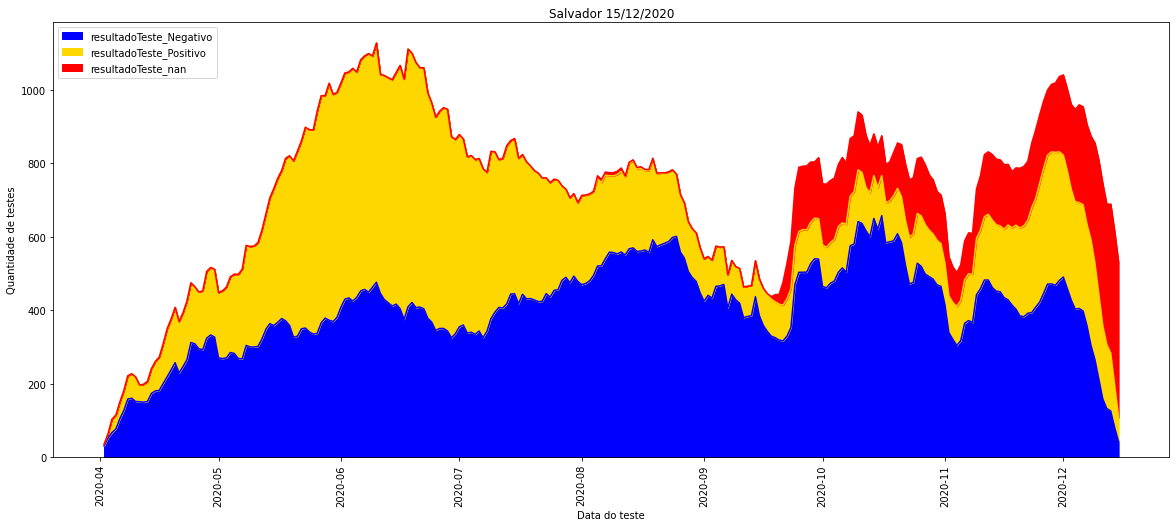

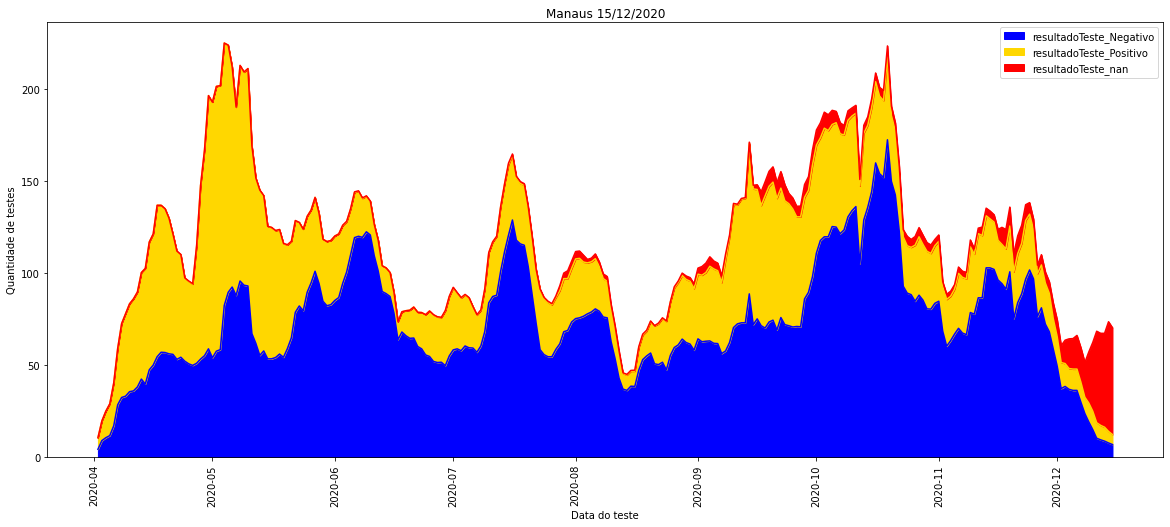

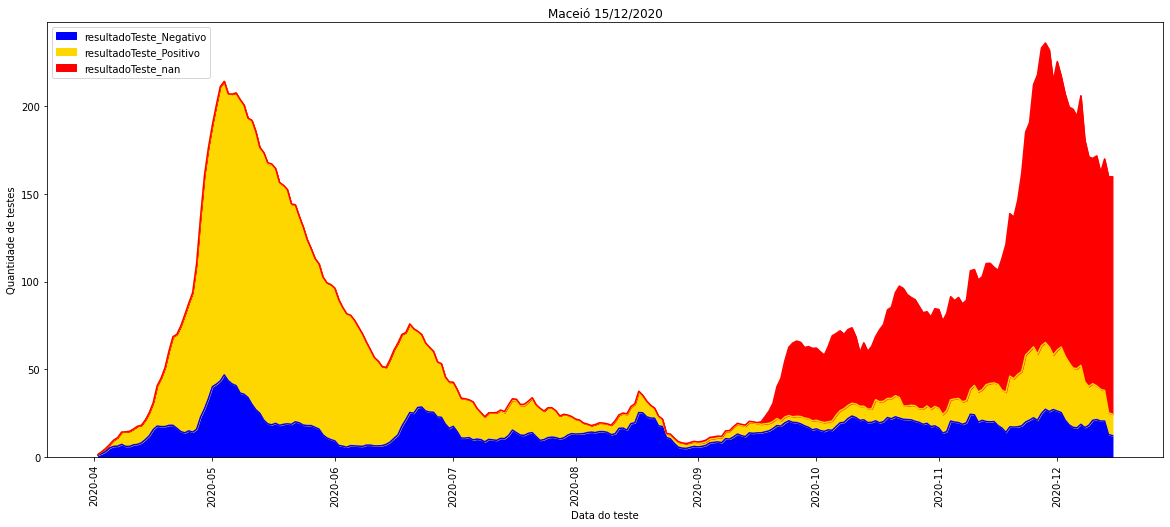

In [2]:
import pandas as pd
import csv
from datetime import datetime
from scipy import stats
import numpy as np
 
caminho = '/content/drive/My Drive/dados/estados 2020-12-16/'
pop = pd.read_csv('https://raw.githubusercontent.com/romulokps/testesPCR/main/populacaoBR.csv')
pop = pop.sort_values(by = 'pop', ascending=False).head(25)
pop = pop.sort_values(by = 'estado', ascending=False)
pop = pop.reset_index()
 
def outliers(df):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 13).all(axis=1)
    df = df[filtered_entries]
    return(df)
def mediaMovel(df, janela):
    for i in range(len(df.columns)):
      df[df.columns[i]] = df[df.columns[i]].rolling(min_periods=1, window=janela).sum()/janela
    return(df)
 
for i in pop.index:
    if ((pop.iloc[i]['estado'] != pop.iloc[i-1]['estado']) ):
     df = pd.read_csv(caminho + pop.iloc[i]['estado'], low_memory = False)
     df['dataTeste'] = pd.to_datetime(df['dataTeste']).dt.date
     df = df[df['dataTeste'] > datetime.strptime('2020-04-01', '%Y-%m-%d').date()]
    estado = pop.iloc[i]['cidade']
    df2 = df
    df2 = df2[df2['municipioNotificacaoIBGE'] == pop.iloc[i]['ibgeID']]
    df2 = df2.replace(np.nan, "nan")
 
    resultado = df2
    resultado = resultado[resultado['resultadoTeste'] != 'Inconclusivo ou Indeterminado']
    resultado = resultado[resultado['tipoTeste'] == 'RT-PCR']
    resultado = resultado[['dataTeste', 'resultadoTeste']]
    resultado = pd.get_dummies(resultado, columns=['resultadoTeste'])
    resultado = resultado.groupby('dataTeste').sum()
    #tipo = df2
 
    #tira os outliers
    resultado = outliers(resultado)
    #Media movel
    resultado = mediaMovel(resultado, 7)
 
 
    #if (i == 0):
    #  total = fe
    #else:
    #  total = total + fe   
    ax = resultado.plot.area(rot=90, figsize = (20,8), color = ["blue","gold","red"])
    ax.set_title(estado + resultado.index[-1].strftime(' %d/%m/%Y'))
    ax.set_xlabel("Data do teste")
    ax.set_ylabel("Quantidade de testes")
    ax.figure.savefig(caminho + "img/"+ pop.iloc[i]['cidade'] + '.png')
    
    #taxai.plot(rot=90, secondary_y=True)